# 4 - Evaluation metrics for classification

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv("data-week3.csv")
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [3]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

## Setting up validation framework
Splitting data into train/validation/test datasets using `train_test_split` method of `sklearn.model_selection` class.

In [4]:
from sklearn.model_selection import train_test_split

# first split the data into ratio 80:20 for training and test dataset
df_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

# next, split the data X_full and y_full into train, and validation dataset
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

In [5]:
# Shape
print("df_train shape::", df_train.shape)
print("df_val shape::", df_val.shape)
print("df_test shape::", df_test.shape)

df_train shape:: (4225, 21)
df_val shape:: (1409, 21)
df_test shape:: (1409, 21)


In [6]:
# Reset the index
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## One-Hot Encoding

In [7]:
# one hot encoding using sklearn.
from sklearn.feature_extraction import DictVectorizer

# Initialize the dictionary vectorizer.
dv = DictVectorizer(sparse=False)

In [8]:
# Convert the data into dictionary object
train_dict = df_train[categorical_cols + numeric_cols].to_dict(orient='records')
val_dict = df_val[categorical_cols + numeric_cols].to_dict(orient='records')
test_dict = df_test[categorical_cols + numeric_cols].to_dict(orient='records')

# fit and transform the data into 0's and 1's
X_transform_train = dv.fit_transform(train_dict)
X_transform_val = dv.transform(val_dict)
X_transform_test = dv.transform(test_dict)

y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

## Training Logistic Regression with Scikit-Learn
We will tarained a model using `LogisticRegression` of `Scikit-learn` library on training data and validate the accuracy of the model using validation dataset.

In [9]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_transform_train, y_train)

# make predictions on validation
y_preds = model.predict_proba(X_transform_val)


# select only probability of 1 or churn.
y_preds = y_preds[:, 1]
print("Accuracy:: ", (y_val == (y_preds>=0.5)).mean())

Accuracy::  0.7998580553584103


## 4.1 Accuracy

Accuracy measures the fraction of total observations that are correctly classified. It is a ratio of the number of total correct classifications to the total number of observations

$$Accuracy = \frac{Total~Correct~Predictions}{Total~Number~of~observations}$$

threshold: 0.00, score: 0.269
threshold: 0.05, score: 0.539
threshold: 0.11, score: 0.625
threshold: 0.16, score: 0.677
threshold: 0.21, score: 0.720
threshold: 0.26, score: 0.748
threshold: 0.32, score: 0.765
threshold: 0.37, score: 0.774
threshold: 0.42, score: 0.788
threshold: 0.47, score: 0.796
threshold: 0.53, score: 0.800
threshold: 0.58, score: 0.793
threshold: 0.63, score: 0.780
threshold: 0.68, score: 0.764
threshold: 0.74, score: 0.749
threshold: 0.79, score: 0.735
threshold: 0.84, score: 0.731
threshold: 0.89, score: 0.731
threshold: 0.95, score: 0.731
threshold: 1.00, score: 0.731


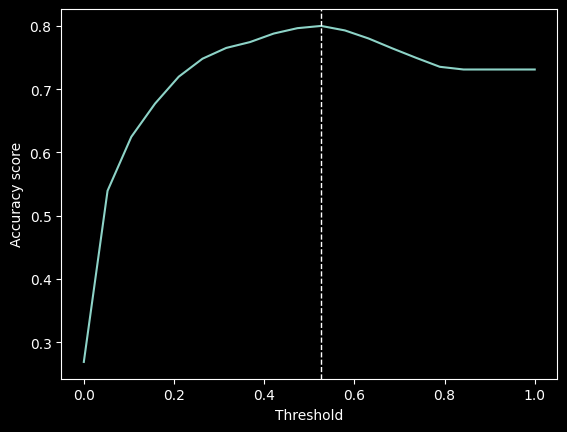

In [10]:
# Measure the predictions for differnt threshold values.

from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 20)

scores = []
for threshold in thresholds:
    score = accuracy_score(y_val, y_preds >= threshold)
    scores.append(score)
    print("threshold: %.2f, score: %.3f" %(threshold, score))

# plot
plt.plot(thresholds, scores)
plt.axvline(x=thresholds[scores.index(max(scores))], ls='--', lw=1)
plt.xlabel("Threshold")
plt.ylabel("Accuracy score")
plt.show()

## 4.2 Confusion Table

In [11]:
y_preds

array([0.16775449, 0.25650271, 0.4312977 , ..., 0.71915682, 0.0457998 ,
       0.03518162])

In [12]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [13]:
t = 0.5
predicted_postive = (y_preds >= t)
predicted_negative = (y_preds < t)

In [14]:
tp = (actual_positive & predicted_postive).sum()
tn = (actual_negative & predicted_negative).sum()

In [15]:
fp = (actual_negative & predicted_postive).sum()
fn = (actual_positive & predicted_negative).sum()

In [16]:
Confusion_matrix = np.array([
    [tp, fp],
    [fn, tn]
])
Confusion_matrix

array([[203, 106],
       [176, 924]])

## 4.3 Precision and Recall

Precision measures the accuracy of the positive prediction i.e. it measures the ratio of positive class out of the total predicted positively by a classifier. Precision helps you to answer the question “How precisely a classifier will predict the positive class?”

$$Precision = \frac{TP}{TP+FP}$$

In [17]:
# Precision
p = tp / (tp + fp)
print("Precision: ", p)

Precision:  0.656957928802589


Recall measures the ratio of positive instances that are correctly classify by the classifier. Recall helps you to answer the question “What proportion of actual positives is correctly classified?”
$$Recall = \frac{TP}{TP+FN}$$

In [18]:
# Recall
r = tp / (tp + fn)
print("Recall:", r)

Recall: 0.5356200527704486


## 4.4 ROC Curve
ROC(Receiver operating characteristic curve) is another way to illustrate the model performance graphically. The ROC curve is created by plotting the true positive rate(TPR) against the false positive rate(FPR) at various thresholds.

$$TPR = \frac{TP}{TP+FN}$$
$$FPR = \frac{FP}{FP+TN}$$


In [19]:
# True positive rate
tpr = tp / (tp + fn)
print("TPR: ", tpr)

# False positive rate
fpr = fp / (fp + tn)
print("FPR: ", fpr)


TPR:  0.5356200527704486
FPR:  0.1029126213592233


In [20]:
scores = []

thresholds = np.linspace(0, 1, 101)
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    
    predicted_postive = (y_preds >= t)
    predicted_negative = (y_preds < t)

    tp = (actual_positive & predicted_postive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_postive).sum()
    fn = (actual_positive & predicted_negative).sum()

    scores.append((t, tp, tn, fp, fn))

In [21]:
df_matrix = pd.DataFrame(scores, columns=['t', 'tp', 'tn', 'fp', 'fn'])
df_matrix['fpr'] = df_matrix.fp / (df_matrix.fp + df_matrix.tn)
df_matrix['tpr'] = df_matrix.tp / (df_matrix.tp + df_matrix.fn)
df_matrix

,t,tp,tn,fp,fn,fpr,tpr
0,0.00,379,0,1030,0,1.000000,1.000000
1,0.01,379,128,902,0,0.875728,1.000000
2,0.02,376,231,799,3,0.775728,0.992084
3,0.03,372,291,739,7,0.717476,0.981530
4,0.04,371,338,692,8,0.671845,0.978892
...,...,...,...,...,...,...,...
96,0.96,0,1030,0,379,0.000000,0.000000
97,0.97,0,1030,0,379,0.000000,0.000000
98,0.98,0,1030,0,379,0.000000,0.000000
99,0.99,0,1030,0,379,0.000000,0.000000


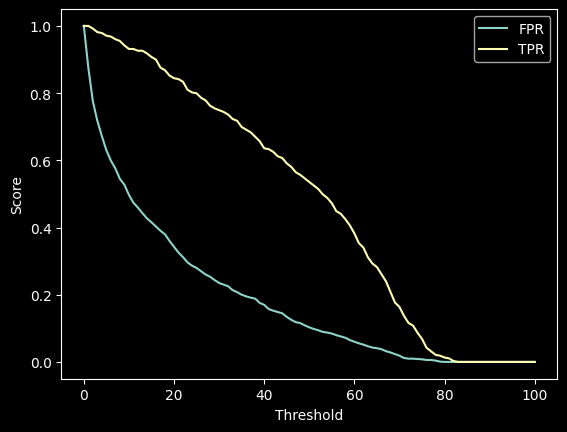

In [22]:
plt.plot(df_matrix['fpr'], label='FPR')
plt.plot(df_matrix['tpr'], label='TPR')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_preds)

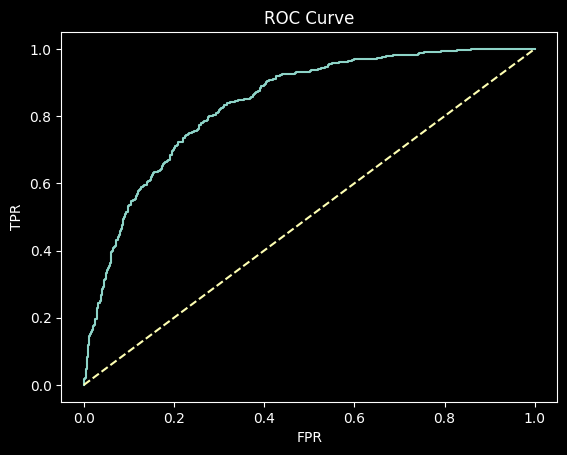

In [24]:
plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], ls='--')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

## 4.5 ROC AUC 
AUC - Area Under the Curve

In [27]:
# Computing auc score using sklearn library
from sklearn.metrics import auc
auc(fpr, tpr)

0.8372057278991727

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)

0.8372057278991727

In [29]:
pos = y_preds[y_val == 1]
neg = y_preds[y_val == 0]

In [30]:
import random 
n = 100000
success = 0

for i in range(n):
    pos_idx = random.randint(0, len(pos)-1)
    neg_idx = random.randint(0, len(neg)-1)

    if pos[pos_idx] > neg[neg_idx]:
        success += 1

"""using numpy
n = 50000
np.random.seed(1)
pos_idx = np.random.randint(0, len(pos), size=n)
neg_idx = np.random.randint(0, len(neg), size=n)
(pos[pos_idx] > neg[neg_idx]).mean()
"""

success / n

0.83823

## 4.6 Cross-Validation

In [31]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_cols + numeric_cols].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [35]:
def predict(df_val, dv, model):
    dicts = df_val[categorical_cols + numeric_cols].to_dict(orient='records')

    X_val = dv.fit_transform(dicts)
    y_preds = model.predict_proba(X_val) 

    return y_preds[:, 1]

In [36]:
dv, model = train(df_train, y_train)
y_preds = predict(df_val, dv, model)

In [37]:
y_preds

array([0.16775449, 0.25650271, 0.4312977 , ..., 0.71915682, 0.0457998 ,
       0.03518162])

In [45]:
# splitting data into 10 folds
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []
for train_idx, val_idx in kfold.split(df_full):
    df_train = df_full.iloc[train_idx]
    df_val = df_full.iloc[val_idx]

    y_train = df_train.churn
    y_val = df_val.churn

    dv, model = train(df_train, y_train, C = 1)
    y_preds = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_preds)
    scores.append(auc)

In [46]:
np.mean(scores)

0.8411031401921033

In [47]:
dv, model = train(df_full, df_full.churn.values, C=1.0)
y_preds = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_preds)
auc

0.8625992422909312